<a href="https://colab.research.google.com/github/hizadoraconstanza/canada/blob/main/Hizadora_Constanza_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_(40530010055_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uma mochileira amante de cinema

**Disciplina:** MVP Análise de Dados e Boas Práticas

**Nome:** Hizadora Constanza Medina DAmbros

**Dataset:** https://raw.githubusercontent.com/hizadoraconstanza/canada/refs/heads/main/canadamovietheatres.csv


# Descrição do Problema

Uma mochileira amante de cinema passará as férias de inverno de 2006/2007 no Canadá.

Como toda mochileira, seu orçamento é limitado e por isso ela precisará escolher bem seu destino entre uma das seis províncias mais populosas do Canadá.

Nossa mochileira precisará encontrar a província com os ingressos mais acessíveis possíveis nessas férias de inverno.

## Hipóteses do Problema

Nossa mochileira quer confirmar se:

- Os valores dos ingressos dos cinemas estão relacionados ao números de cinemas?

- Quanto mais cinemas há na província, menor o valor dos ingressos?

## Tipo de Problema

Nossa mochileira escolheu um problema de classificação supervisionada, pois a partir do conjunto de atributos escolhidos ela tem como objetivo encontrar a província com valor de ingresso mais acessível.

## Seleção de Dados

O dataset CanadaMovieTheatres foi estruturado a partir do conjunto de dados "Movie theatres and drive-ins" disponibilizado pela University of Toronto e School of Cities.

Os dados contém uma série histórica de atributos de geografia, intraestrutura e operações dos cinemas das províncias do Canadá no período de 1996/1997 - 2004/2005.

As seis províncias com maior população do Canada foram escolhidas para compor o dataset, são elas: Ontario, Quebec, British Columbia, Alberta, Saskatchewan e Manitoba.

## Atributos do Dataset

O dataset contém os seguintes atributos:

- ***location*** (nome da província)
- ***ref_date*** (data de referência, bianual)
- ***num_theatres*** (número de cinemas, unidade)
- ***num_seats*** (número de assentos, unidade)
- ***total_operating_revenue*** (total de receitas operacionais, dólares)
- ***total_operating_expenses*** (total de despesas operacionais, dólares)
- ***average_ticket_prices*** (preço médio dos ingressos, dólares)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção realiza as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, assim como o carregamento inicial do dataset.

In [153]:
import pandas as pd
import numpy as np
import missingno as ms
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [154]:
#Informação da url de importação do dataset
url = "https://raw.githubusercontent.com/hizadoraconstanza/canada/refs/heads/main/canadamovietheatres.csv"

In [155]:
#Leitura do arquivo
dataset = pd.read_csv(url, delimiter=',')

# Análise de Dados

Essa seção realiza a Análise de Dados Exploratória (EDA) sobre o dataset para entender a distribuição, as relações e as características das variáveis.

## Total e Tipo das Instâncias

O dataset possui 54 instâncias (observações), com 9 instâncias para cada uma das 6 províncias escolhidas. Há 5 atributos do tipo numérico (float) e 2 atributos do tipo categórico (object).

A descrição do dataset e a visualização das últimas linhas demostra a apresença de valores nulos, que serão tratados na seção correspondente.

O gráfico de barras demostra que o dataset é balanceado pois todas as províncias possuem igual número de instâncias, contudo já identificamos que algumas delas possuem valores nulos.

In [156]:
#Dimensões do dataset
dataset.shape

(54, 7)

In [157]:
#Informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   location                  54 non-null     object 
 1   ref_date                  54 non-null     object 
 2   num_theatres              48 non-null     float64
 3   num_seats                 37 non-null     float64
 4   total_operating_revenue   48 non-null     float64
 5   total_operating_expenses  37 non-null     float64
 6   average_ticket_prices     37 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.1+ KB


In [158]:
#Informações das 5 primeiras linhas do dataset
dataset.head (5)

,location,ref_date,num_theatres,num_seats,total_operating_revenue,total_operating_expenses,average_ticket_prices
0,Ontario,1996/1997,189.0,182121.0,233615.0,208588.0,5.13
1,Ontario,1997/1998,192.0,196078.0,258046.0,227034.0,5.38
2,Ontario,1998/1999,184.0,212140.0,311490.0,287096.0,5.70
3,Ontario,1999/2000,200.0,263030.0,359732.0,355712.0,6.14
4,Ontario,2000/2001,211.0,282015.0,397633.0,425364.0,6.78


In [159]:
#Informações das 5 últimas linhas do dataset
dataset.tail(5)

,location,ref_date,num_theatres,num_seats,total_operating_revenue,total_operating_expenses,average_ticket_prices
49,Manitoba,2000/2001,35.0,26217.0,31321.0,34918.0,5.33
50,Manitoba,2001/2002,NaN,NaN,NaN,NaN,NaN
51,Manitoba,2002/2003,34.0,23142.0,38948.0,36496.0,5.53
52,Manitoba,2003/2004,32.0,24008.0,38781.0,36133.0,5.77
53,Manitoba,2004/2005,36.0,24198.0,39366.0,35793.0,5.80


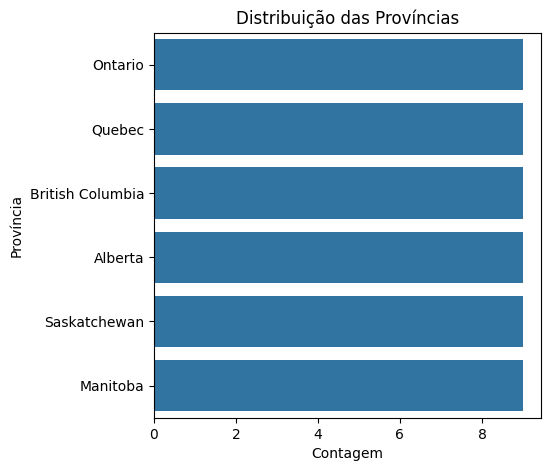

In [160]:
# Distribuição do dataset pelo atributo 'location'
plt.figure(figsize=(5, 5))
sns.countplot(y='location', data=dataset)
plt.title('Distribuição das Províncias')
plt.xlabel('Contagem')
plt.ylabel('Província')
plt.show()

## Estatísticas descritivas

Essa seção apresenta as estatísticas descritivas dos atributos numéricos.

Observa-se que o número de cinemas situa-se entre 28 e 211 cinemas, enquanto o número de assentos está entre quase 17mil e pouco mais de 282mil assentos. Os valores de receita e despesas estão entre pouco mais de 10mil dólares e quase 50mil dólares. O valor dos ingressos está entre 4 e 8,21 dólares.

In [161]:
# Calcula as estatísticas descritivas básicas do dataset
dataset.describe()

,num_theatres,num_seats,total_operating_revenue,total_operating_expenses,average_ticket_prices
count,48.000000,37.000000,48.000000,37.000000,37.000000
mean,92.500000,101572.837838,151246.958333,148437.513514,5.662162
std,52.047033,84179.944599,128737.187310,142065.231475,1.087457
min,28.000000,16975.000000,12914.000000,11267.000000,4.000000
25%,39.750000,22949.000000,31163.750000,23403.000000,5.030000
50%,88.500000,95312.000000,130139.000000,119391.000000,5.470000
75%,118.250000,156209.000000,203449.750000,227034.000000,6.160000
max,211.000000,282015.000000,485707.000000,461257.000000,8.210000


### Média

Essa subseção apresenta a média calculada de modo independente das demais estatísticas, pois os mesmos valores foram apresentados na seção anterior. A média do número de cinemas é maior que 90, enquanto o número médio de assentos é superior a 100mil. Os valores médios de receitas e despesas operacionais estão próximo dos 150mil dólares e o valor médio do ingresso é igual a 5,66 dólares

In [162]:
# Calcula a média dos atributos numéricos do dataset
dataset.describe().loc['mean']

,mean
num_theatres,92.500000
num_seats,101572.837838
total_operating_revenue,151246.958333
total_operating_expenses,148437.513514
average_ticket_prices,5.662162


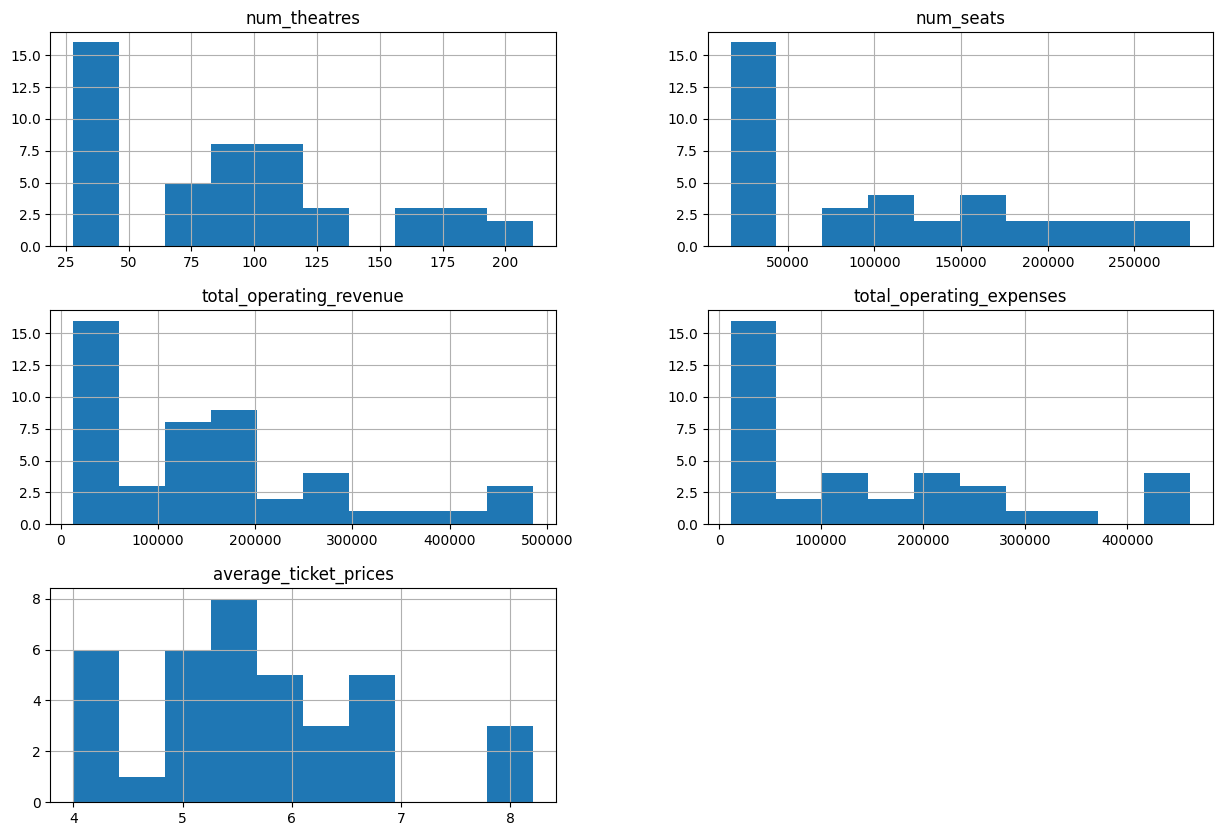

In [163]:
# Exibe histograma dos valores do dataset
dataset.hist(figsize =(15,10))
plt.show()

### Desvio padrão

Essa subseção apresenta a média calculada de modo independente das demais estatísticas, pois os mesmos valores foram apresentados na seção anterior. Os maiores desvios padrões são observados em relação aos valores de despesas e receitas operacionais, enquanto os menores são observados para os valores dos ingressos e número de cinemas. Os atributos valores de despesas e receitas operacionais, assim como valor médio de ingressos possuem outliers, conforme demostrado pelo boxplot.

In [164]:
# Calcula desvio padrão dos atributos numéricos do dataset
dataset.describe().loc['std']

,std
num_theatres,52.047033
num_seats,84179.944599
total_operating_revenue,128737.187310
total_operating_expenses,142065.231475
average_ticket_prices,1.087457


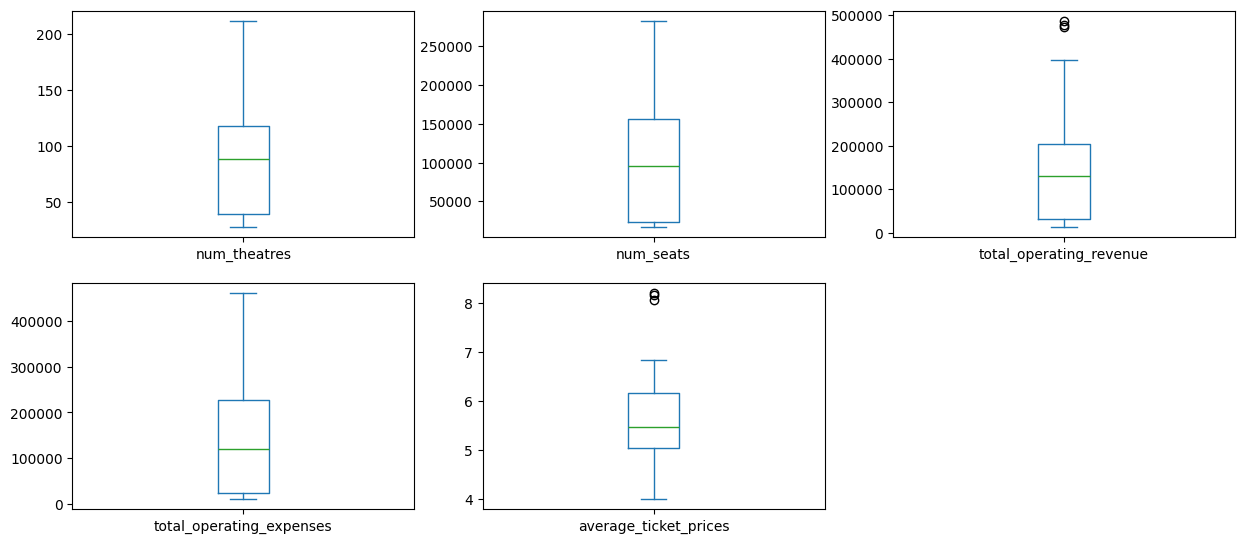

In [165]:
# Exibe boxplot dos valores do dataset
dataset.plot(kind = 'box',subplots = True, layout = (3,3), sharex = False,sharey = False,figsize =(15,10))
plt.show()

## Histograma

Essa seção apresenta o histograma para os atributos totais de receitas operacionais e total de despesas operacionais, permitindo analisar a distribuição dos seus valores.

### Total de receitas operacionais

Observa-se distribuição unimodal assimétrica, com maior incidência para valores de receitas operacionais inferiores e próximos a 200mil dólares.


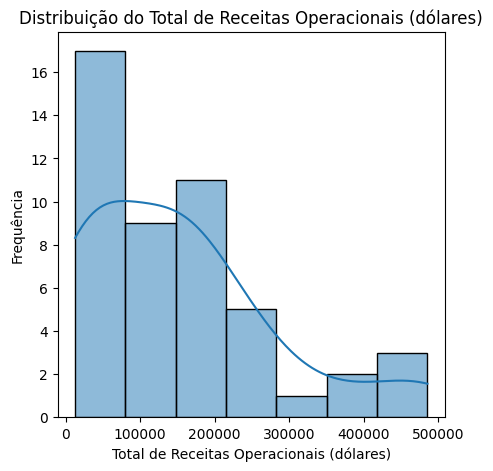

In [166]:
#Exibe o histograma do atributo 'total_operating_revenue'
plt.figure(figsize=(5, 5))
sns.histplot(dataset['total_operating_revenue'],kde=True)
plt.title('Distribuição do Total de Receitas Operacionais (dólares)')
plt.xlabel('Total de Receitas Operacionais (dólares)')
plt.ylabel('Frequência')
plt.show()

### Total de despesas operacionais

Observa-se distribuição unimodal assimétrica, com maior incidência para valores de despesas operacionais também inferiores e próximos a 200mil dólares.

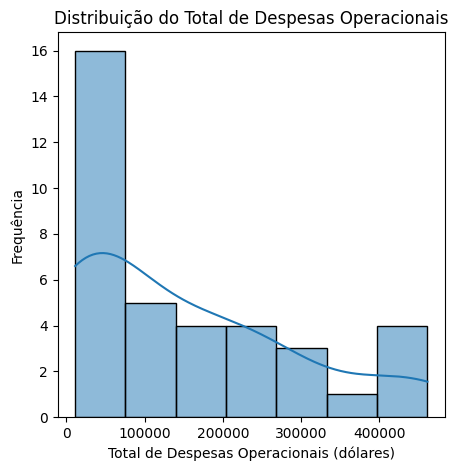

In [167]:
#Exibe histograma do atributo 'total_operating_expenses'
plt.figure(figsize=(5, 5))
sns.histplot(dataset['total_operating_expenses'],kde=True)
plt.title('Distribuição do Total de Despesas Operacionais')
plt.xlabel('Total de Despesas Operacionais (dólares)')
plt.ylabel('Frequência')
plt.show()

## Boxplot

Essa seção apresenta o boxplot para os atributos número de cinemas e valor médio dos ingressos, permitindo analisar a seu comportamento nas diferentes províncias.


In [168]:
# Calcula estatísticas descritivas agrupadas pelo atributo 'location'
dataset.groupby('location').describe()

num_theatres                                            \
                        count     mean        std    min     25%    50%   
location                                                                  
Alberta                   8.0   81.250   5.092011   75.0   77.00   80.0   
British Columbia          8.0  100.000   7.596992   89.0   96.25   98.0   
Manitoba                  8.0   31.750   3.011881   28.0   29.00   31.5   
Ontario                   8.0  182.625  19.145589  159.0  163.00  186.5   
Quebec                    8.0  119.250   7.478541  107.0  115.75  118.5   
Saskatchewan              8.0   40.125   3.270539   37.0   37.75   39.5   

                                num_seats              ...  \
                     75%    max     count        mean  ...   
location                                               ...   
Alberta            86.25   88.0       0.0         NaN  ...   
British Columbia  105.25  113.0       5.0   92152.400  ...   
Manitoba           34.25   36.0       8.0   22342.375  ...   
Ontario           194.00  211.0       8.0  228823.625  ...   
Quebec            122.25  130.0       8.0  139362.875  ...   
Saskatchewan       41.00   46.0       8.0   21650.250  ...   

                 total_operating_expenses           average_ticket_prices  \
                                      75%       max                 count   
location                                                                    
Alberta                               NaN       NaN                   0.0   
British Columbia                143396.00  162570.0                   5.0   
Manitoba                         35878.00   36496.0                   8.0   
Ontario                         434999.75  461257.0                   8.0   
Quebec                          265668.25  269607.0                   8.0   
Saskatchewan                     22791.75   24729.0                   8.0   

                                                                        
                     mean       std   min     25%    50%     75%   max  
location                                                                
Alberta               NaN       NaN   NaN     NaN    NaN     NaN   NaN  
British Columbia  5.85400  0.598105  5.09  5.4400  5.940  6.2100  6.59  
Manitoba          5.03500  0.665368  4.28  4.3075  5.145  5.5900  5.80  
Ontario           6.69625  1.299329  5.13  5.6200  6.460  8.0875  8.21  
Quebec            6.03250  0.720154  5.08  5.4575  5.910  6.8150  6.83  
Saskatchewan      4.76500  0.673201  4.00  4.1000  4.840  5.1275  5.83  

[6 rows x 40 columns]

### Número de cinemas por Província

Observa-se que os menores números de cinemas estão nas províncias de Saskatchewan e Manitoba, depois há um segundo grupo menor com as províncias Alberta, British Columbia e Quebec. Os maiores números de cinemas estão na província de Ontario e que possui também a maior dispersão de valores para esse atributo.


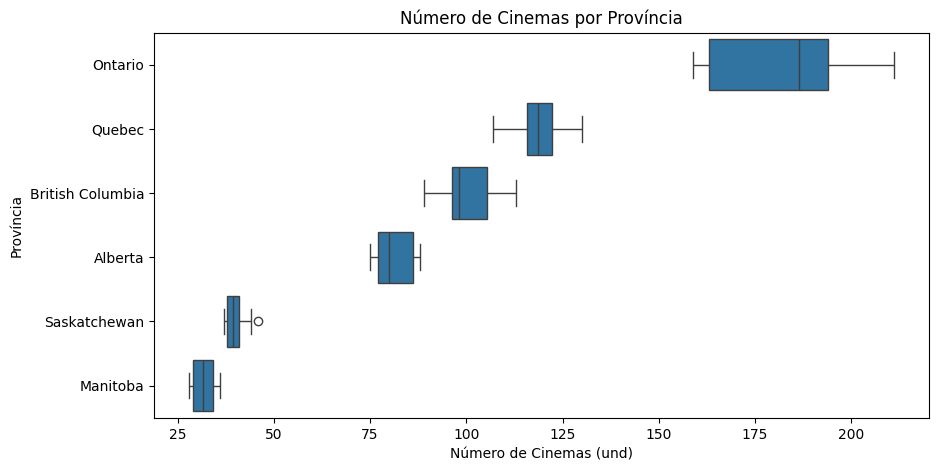

In [169]:
# Exibe boxplot do atributo 'num_theatres' por 'location'
plt.figure(figsize=(10, 5))
sns.boxplot(x='num_theatres', y='location', data=dataset)
plt.title('Número de Cinemas por Província')
plt.xlabel('Número de Cinemas (und)')
plt.ylabel('Província')
plt.show()

### Valor médio dos ingressos por Província

Observa-se que os menores valores de ingressos estão nas províncias de Manitoba e Saskatchewan, contudo a primeira possui o maior valor médio dos ingresso quando ambas são comparadas isoladamente. Os maiores valores de ingressos estão em Ontario e Quebec, sendo que a primeira possui a maior dispersão de valores para esse atributo.





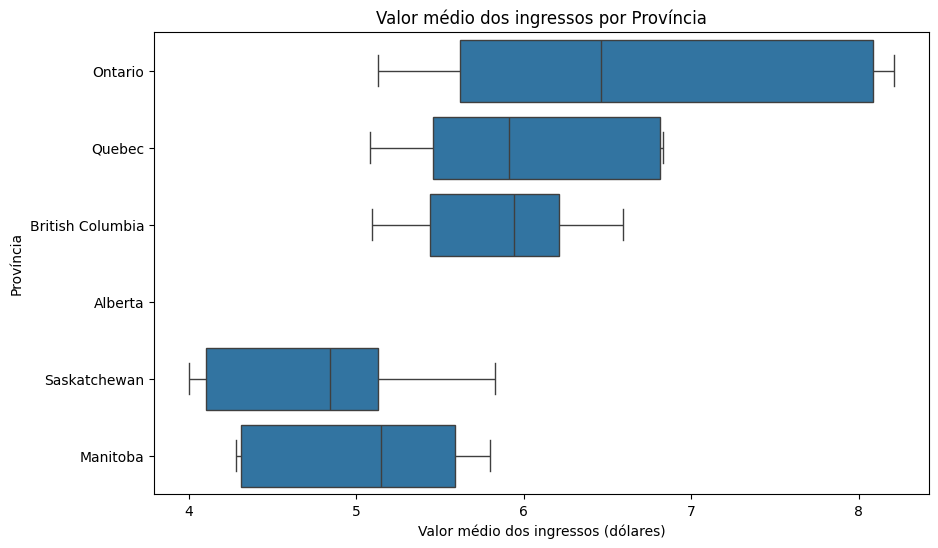

In [170]:
# Exibe boxplot do atributo 'average_ticket_prices' por 'location'
plt.figure(figsize=(10, 6))
sns.boxplot(x='average_ticket_prices', y='location', data=dataset)
plt.title('Valor médio dos ingressos por Província')
plt.xlabel('Valor médio dos ingressos (dólares)')
plt.ylabel('Província')
plt.show()

## Scatterplot

Essa seção apresenta o scatterplot os diferentes atributos, permitindo analisar o comportamento dos atributos dois a dois e verificar sua ocorrência por província.


### Valor médio dos ingressos por Número de Cinemas

Observa-se que os menores valores de ingressos estão nas províncias Manitoba e Saskatchewan as quais possuem os menores números de cinemas, seguidas de Quebec e British Columbia. Os maiores valores de ingressos e números de cinemas estão em Ontario. Destaca-se que não há ocorrências para a província de Alberta, o que será analisado na seção correspondente.


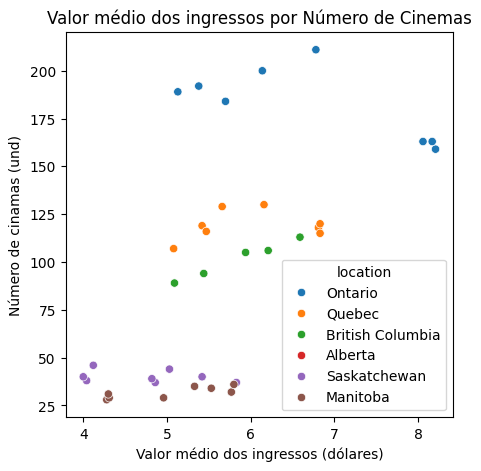

In [171]:
# Exibe scatterplot dos atributos 'average_ticket_prices' por 'num_theatres'
plt.figure(figsize=(5, 5))
sns.scatterplot(x='average_ticket_prices',y='num_theatres',hue='location',data=dataset)
plt.title('Valor médio dos ingressos por Número de Cinemas')
plt.xlabel('Valor médio dos ingressos (dólares)')
plt.ylabel('Número de cinamas (und)')
plt.show()

### Valores de receitas e despesas por Província

Observa-se que os menores valores de receitas e despesas operacionais estão nas províncias Manitoba e Saskatchewan, logo depois temos Quebec e British Columbia. Os maiores valores estão em Ontario. Destaca-se que novamnte não há ocorrências para a província de Alberta, o que será analisado na seção correpondente.





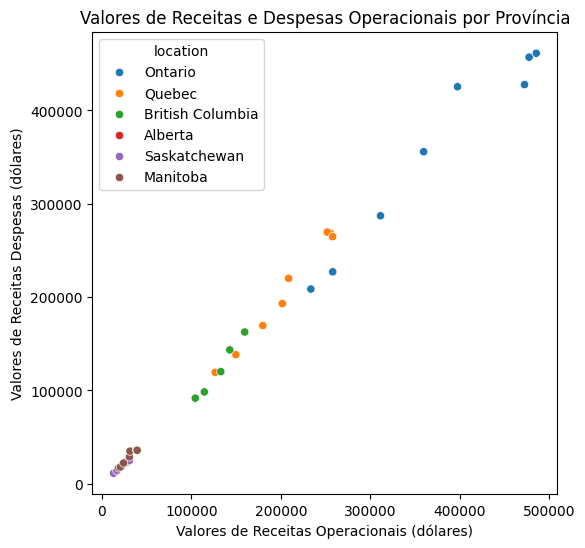

In [172]:
# Exibe scatterplot dos atributos 'total_operating_revenue' por 'total_operating_expenses'
plt.figure(figsize=(6, 6))
sns.scatterplot(x='total_operating_revenue',y='total_operating_expenses',hue='location',data=dataset)
plt.title('Valores de Receitas e Despesas Operacionais por Província')
plt.xlabel('Valores de Receitas Operacionais (dólares)')
plt.ylabel('Valores de Receitas Despesas (dólares)')
plt.show()

## Matriz de Correlação

Essa seção apresenta a matriz de correlação entre as variáveis numéricas.

Observa-se maior correlação entre os valores de receitas e despesas operacionais (1.0) e a menor correlação entre número de cinemas e valor médio dos ingressos (0.62). Ambos foram sucitados pelas visualizações do scatterplot desses atributos nas seções anteriores.

Também há boa correlação entre número de assentos e valores de despesas e receitas operacionais (0.97), assim como número de cinemas e essas mesmas variáveis operaionais (0.89).

Por fim, há correlação um pouco menor entre o valor médio dos ingressos e valores de despesas e receitas operacionais (0.84 e 0.83, respectivamente).

In [173]:
# Calcula a matriz de correlação entre as vaiáveis numéricas
dataset.corr(numeric_only=True)

,num_theatres,num_seats,total_operating_revenue,total_operating_expenses,average_ticket_prices
num_theatres,1.000000,0.971700,0.888193,0.890393,0.617039
num_seats,0.971700,1.000000,0.963048,0.966646,0.728647
total_operating_revenue,0.888193,0.963048,1.000000,0.995901,0.834977
total_operating_expenses,0.890393,0.966646,0.995901,1.000000,0.842001
average_ticket_prices,0.617039,0.728647,0.834977,0.842001,1.000000


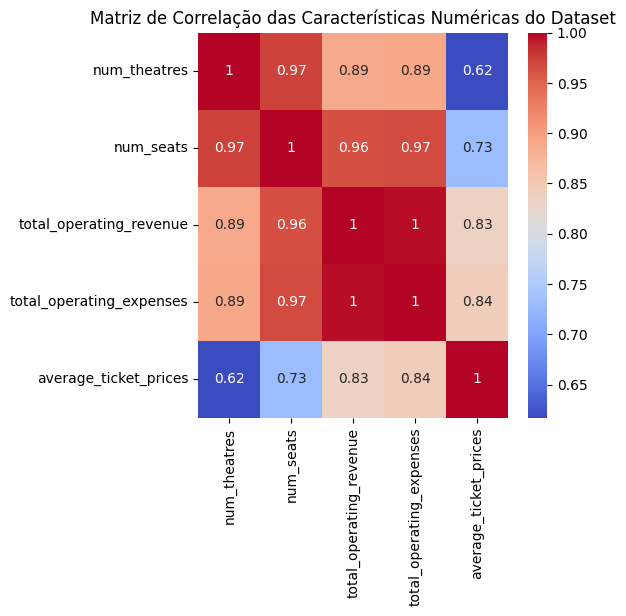

In [174]:
# Exibe o mapa de calor das variáveis numéricas
plt.figure(figsize=(5, 5))
numeric_df = dataset.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação das Características Numéricas do Dataset')
plt.show()

## Tratamento de Valores Nulos

Essa seção apresenta a análise e tratamento de valores nulos.

Observa-se a ocorrência de valores nulos em todos os atributos numéricos, principalmente para números de assentos, valores de receita e depesas operacionais, bem como valor médio do ingresso.

Em alguns casos esses valores nulos se estendem para todos os atributos numéricos do dataset, comforme observado na matriz de nulidade. Em outro estão setorizados em três atributos (número de assentos, valores de depesas operacionais e valor médio dos ingressos).
  
Também destaca-se a visualização dos atributos relacionados a provincía de Alberta que confirma a nulidade dos valores para maior parte das variáveis, connforme sucitados pelas pelas vizualizações do scatterplot em seções anteriores.

Por fim, os valores nulos foram retirados do dataset devido a ausência de valores médios que pudessem ser inseridos em susituição aos valores nulos identificados na província Alberta.



In [175]:
#Verifica valores nulos no dataset
dataset.isnull().sum()

,0
location,0
ref_date,0
num_theatres,6
num_seats,17
total_operating_revenue,6
total_operating_expenses,17
average_ticket_prices,17


<Axes: >

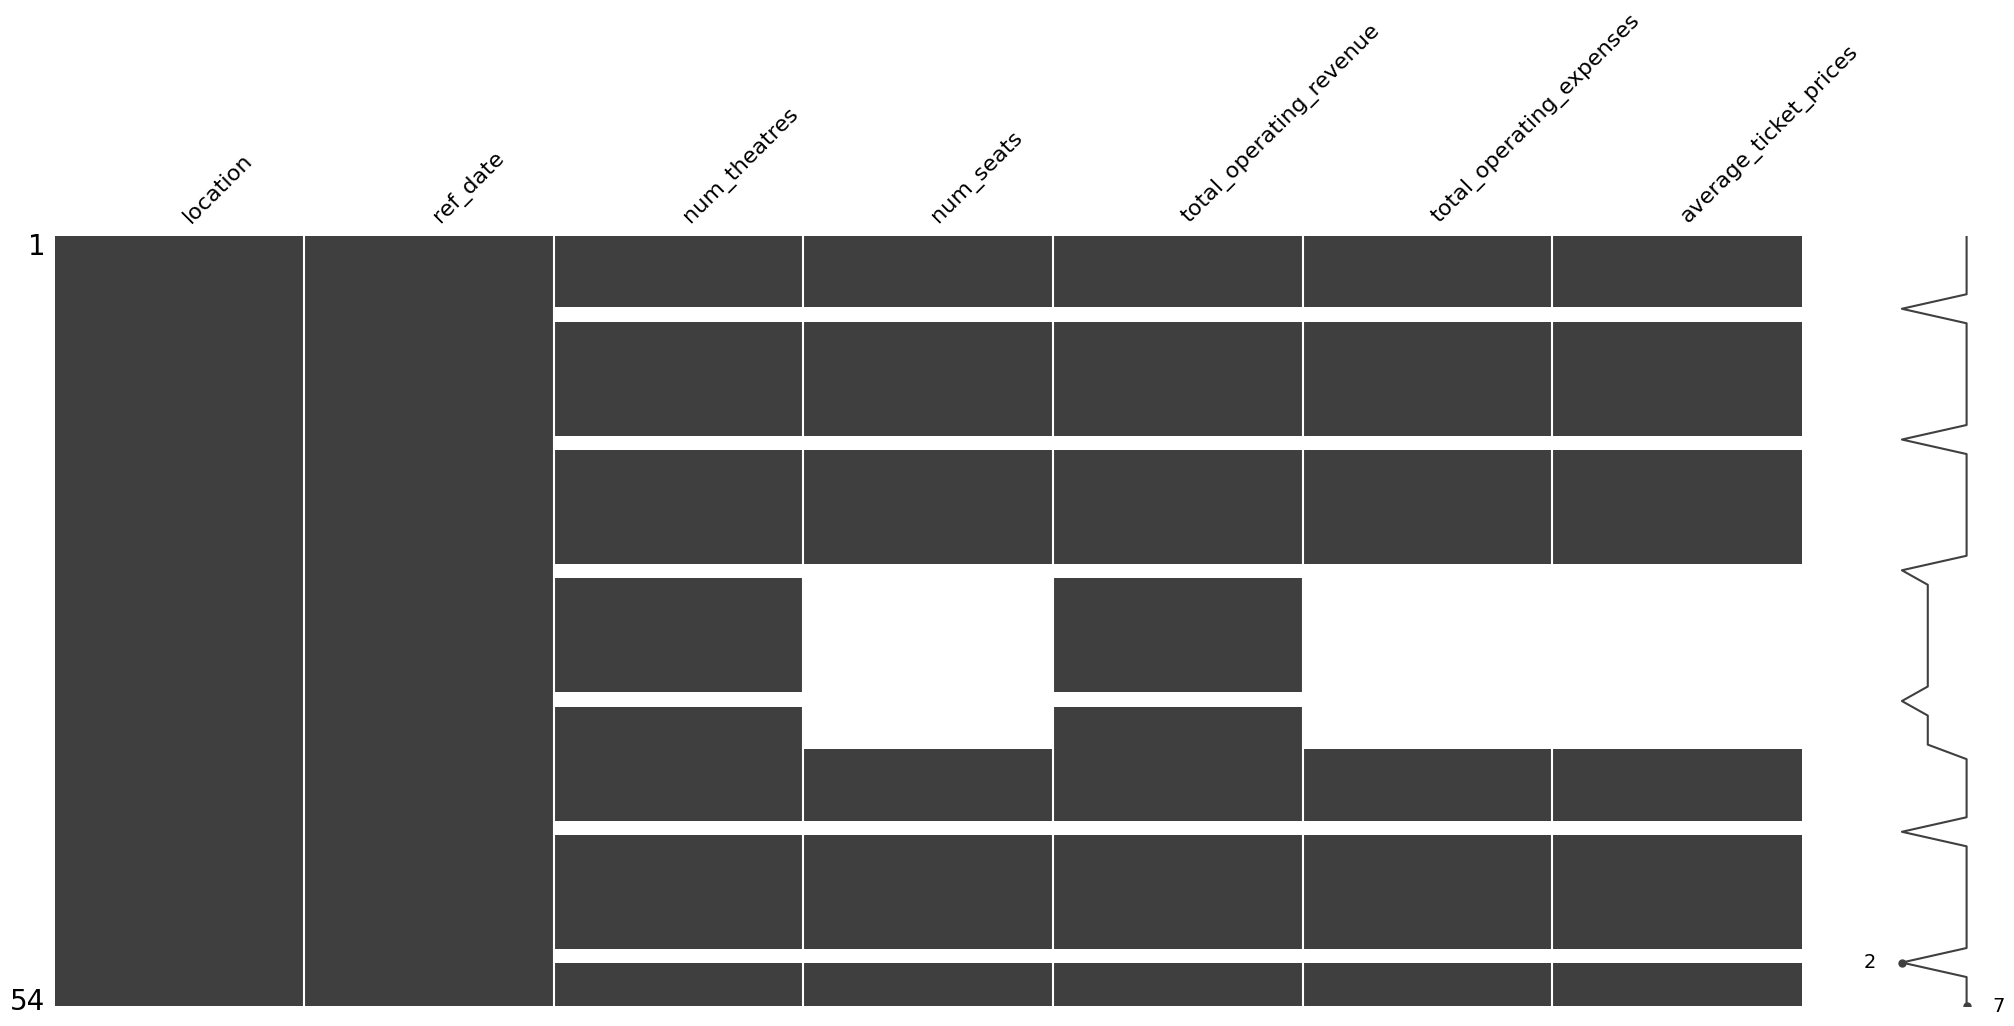

In [176]:
#Exibe a matriz da nulidade do dataset
ms.matrix(dataset)

In [177]:
#Exibe as linhas relacionadas a província de Alberta
dataset[dataset['location']=='Alberta']

,location,ref_date,num_theatres,num_seats,total_operating_revenue,total_operating_expenses,average_ticket_prices
27,Alberta,1996/1997,79.0,NaN,76287.0,NaN,NaN
28,Alberta,1997/1998,81.0,NaN,93320.0,NaN,NaN
29,Alberta,1998/1999,86.0,NaN,107628.0,NaN,NaN
30,Alberta,1999/2000,88.0,NaN,118213.0,NaN,NaN
31,Alberta,2000/2001,87.0,NaN,127416.0,NaN,NaN
32,Alberta,2001/2002,NaN,NaN,NaN,NaN,NaN
33,Alberta,2002/2003,77.0,NaN,162397.0,NaN,NaN
34,Alberta,2003/2004,77.0,NaN,159805.0,NaN,NaN
35,Alberta,2004/2005,75.0,NaN,170883.0,NaN,NaN


In [178]:
#Exclui linhas com valores nulos do dataset
dataset.dropna(inplace=True)

<Axes: >

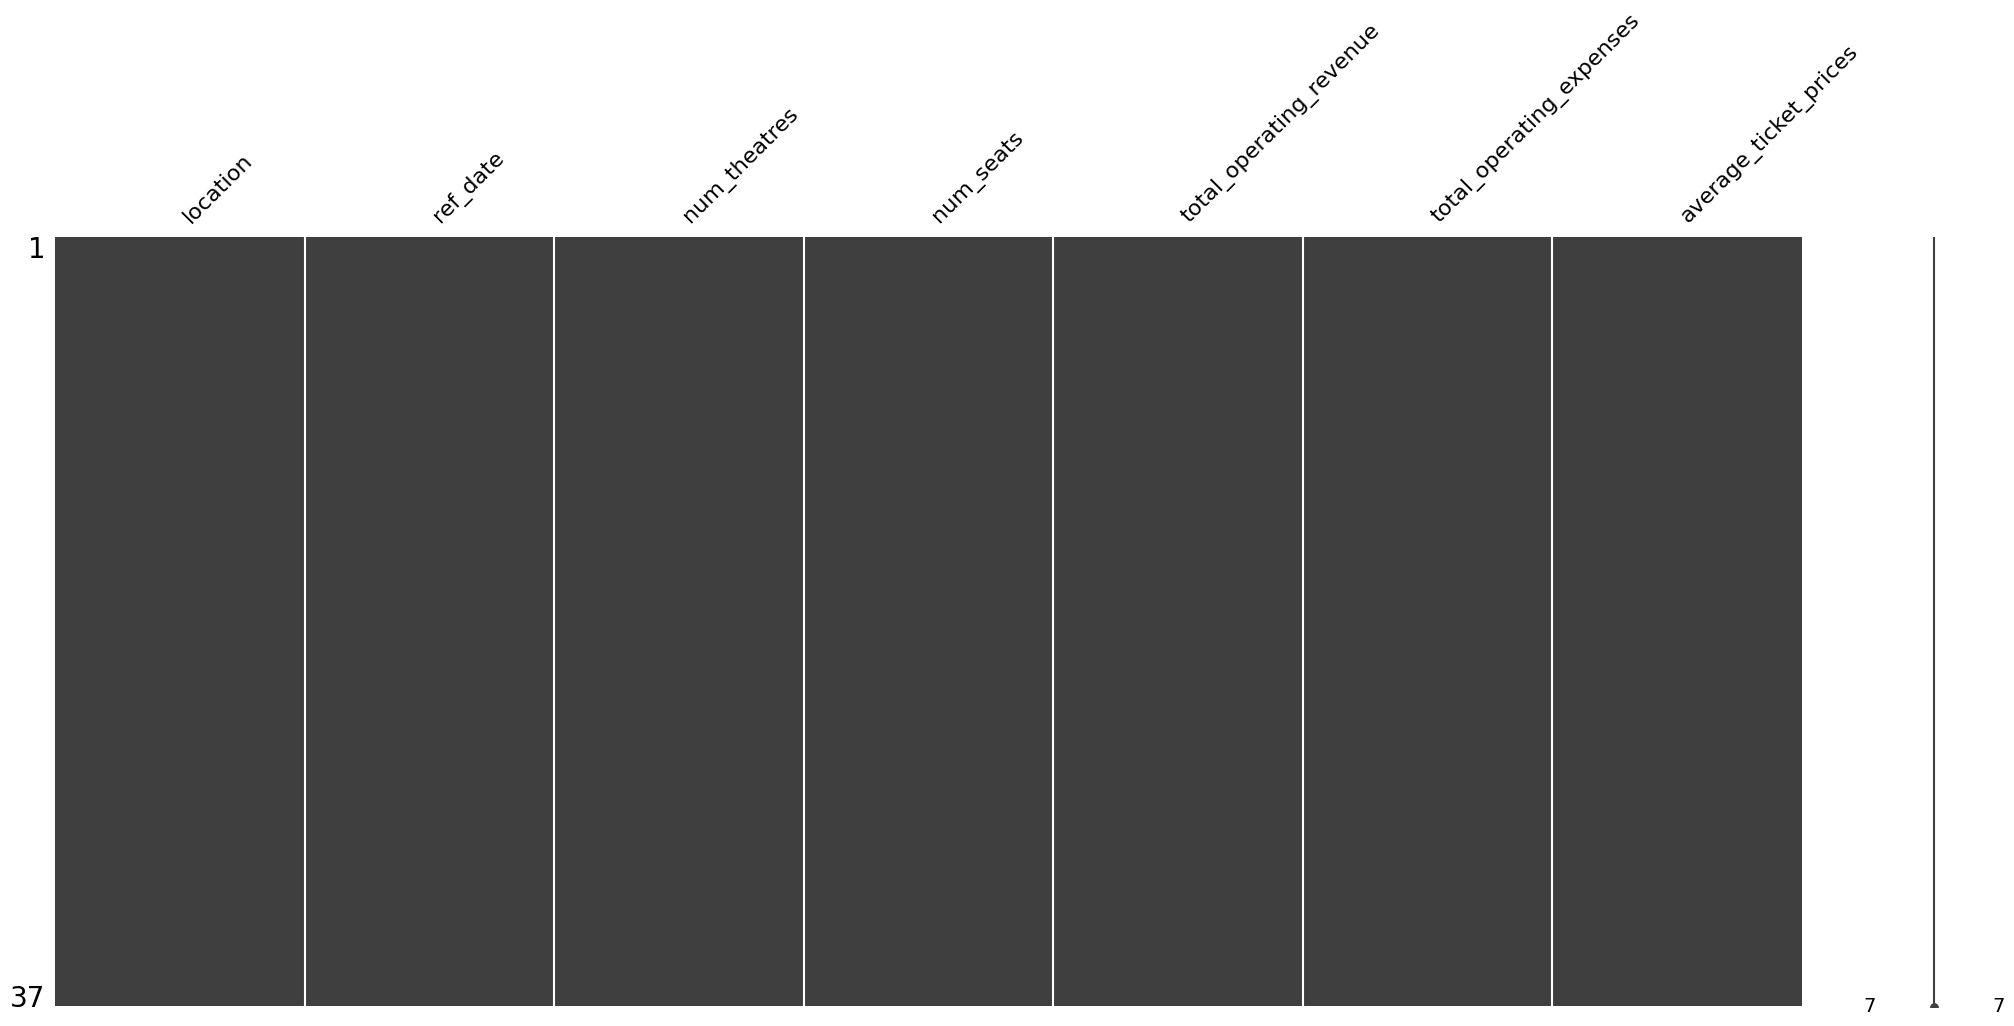

In [179]:
#Exibe nova matriz da nulidade do dataset
ms.matrix(dataset)

In [180]:
#Dimensões do novo dataset
dataset.shape

(37, 7)

# Pré-Processamento de Dados

Essa seção apresente o pré-processamento de dados preparando-os para modelagem.

In [181]:
# Separa features (X) e target (y)
x = dataset.drop('location', axis=1)
y = dataset['location']

In [182]:
# Dividi os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [183]:
#Exibe as dimensões dos conjuntos de treino e teste
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (25, 6)
Dimensões de X_test: (12, 6)
Dimensões de y_train: (25,)
Dimensões de y_test: (12,)


# Conclusão

Uma mochileira amante de cinema construiu este dataset para encontrar o melhor destino para seus férias de inverno. A análise e pré-processamento do dataset demostraram seu balaceamento inicial, contudo foram necessários tramentos para valores nulos encontrados ao longo das análises. Além disso, a análise exploratória revelou correlações pouco signiicativas para as variáveis mais relevantes às hipóteses levantadas.

Assim as hipóteses do problema não foram confirmadas.

* Os valores dos ingressos dos cinemas estão relacionados ao números de cinemas?

Não, a correlação observada foi pouco significativa entre esses atributos, havendo maior correlação entre os valores de ingresso e valores de receitas/despesas operacionais, e também valores de ingresso e número de assentos, conforme observação do scatterplot e matriz de correlação.

* Quanto mais cinemas há na província, menor o valor dos ingressos?

Não, conforme descrito no intem anterior, esses atributos não possuem uma correlação significativa.

